ref. https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130360

In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    
from pathlib import Path



/kaggle/input
/kaggle/input/abstraction-and-reasoning-challenge
/kaggle/input/abstraction-and-reasoning-challenge/evaluation
/kaggle/input/abstraction-and-reasoning-challenge/test
/kaggle/input/abstraction-and-reasoning-challenge/training


In [2]:
data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 400 100


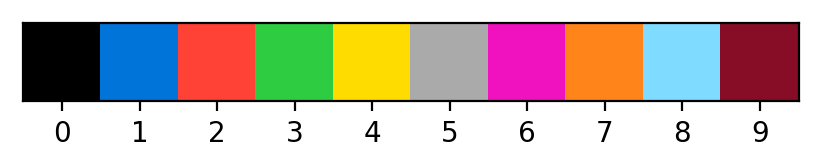

In [3]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()
    


In [4]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [5]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

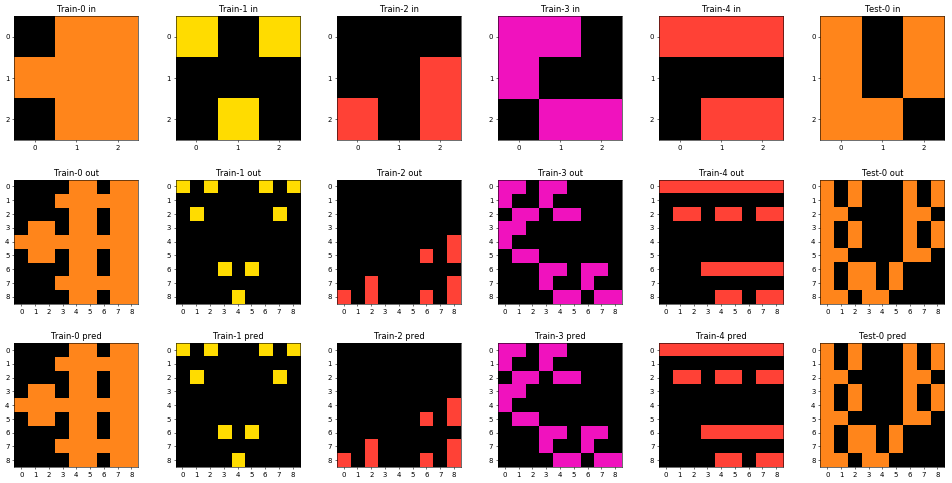

In [6]:
def task_train000(x):
    x_upsampled = x.repeat(3, axis=0).repeat(3, axis=1)
    x_tiled = np.tile(x, (3, 3))
    y = x_upsampled & x_tiled
    return y

task = get_data(str(training_path / training_tasks[0]))
check(task, task_train000)

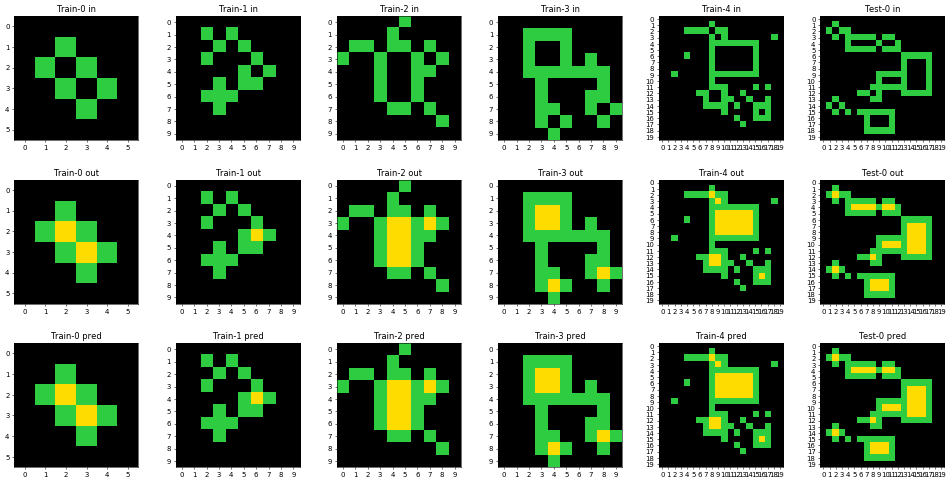

In [7]:
def task_train001(x):
    green, yellow = color2num["green"], color2num["yellow"]
    
    def get_closed_area(arr):
        # depth first search
        H, W = arr.shape
        Dy = [0, -1, 0, 1]
        Dx = [1, 0, -1, 0]
        arr_padded = np.pad(arr, ((1,1),(1,1)), "constant", constant_values=0)
        searched = np.zeros(arr_padded.shape, dtype=bool)
        searched[0, 0] = True
        q = [(0, 0)]
        while q:
            y, x = q.pop()
            for dy, dx in zip(Dy, Dx):
                y_, x_ = y+dy, x+dx
                if not 0 <= y_ < H+2 or not 0 <= x_ < W+2:
                    continue
                if not searched[y_][x_] and arr_padded[y_][x_]==0:
                    q.append((y_, x_))
                    searched[y_, x_] = True
        res = searched[1:-1, 1:-1]
        res |= arr==green
        return ~res
        
    y = x.copy()
    y[get_closed_area(x)] = yellow
    return y

task = get_data(str(training_path / training_tasks[1]))
check(task, task_train001)

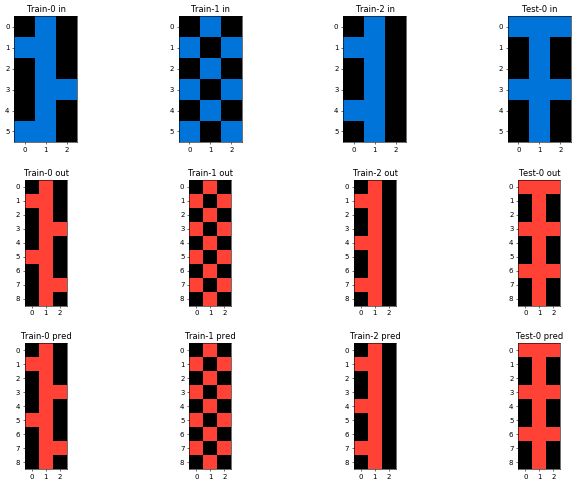

In [8]:
def task_train002(x):
    red, blue = color2num["red"], color2num["blue"]
    
    def get_period_length(arr):
        H, W = arr.shape
        period = 1
        while True:
            cycled = np.pad(arr[:period, :], ((0,H-period),(0,0)), 'wrap')
            if (cycled==arr).all():
                return period
            period += 1
            
    def change_color(arr, d):
        res = arr.copy()
        for k, v in d.items():
            res[arr==k] = v
        return res
            
    period = get_period_length(x)
    y = x[:period, :]  # clop one period
    y = np.pad(y, ((0,9-period),(0,0)), 'wrap')  # cycle
    y = change_color(y, {blue: red})
    return y
    
task = get_data(str(training_path / training_tasks[2]))
check(task, task_train002)

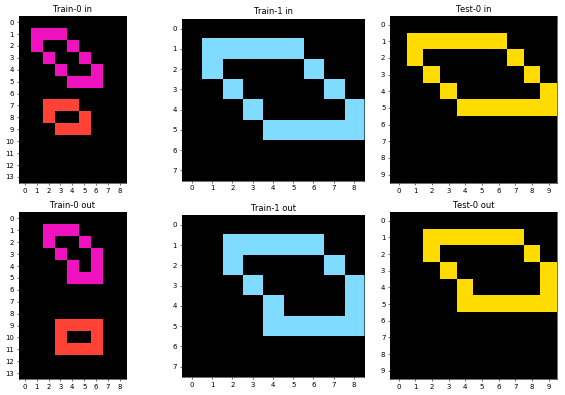

In [9]:
# I couldn't find out the rule of task Train003.
plot_task(get_data(str(training_path / training_tasks[3])))

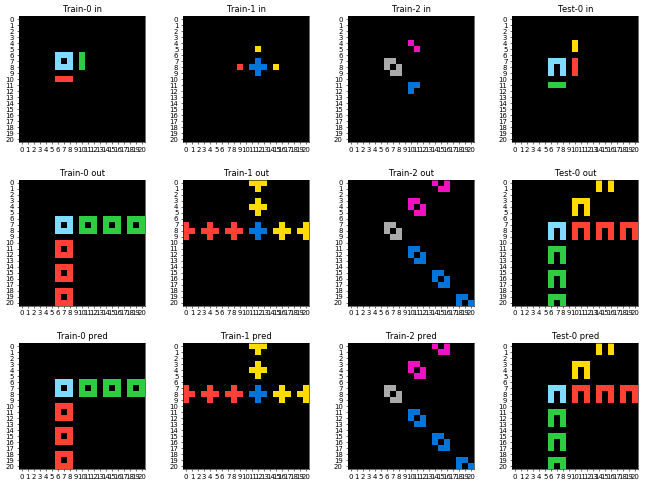

In [10]:
def task_train004(x):
    def get_3x3_base_pattern(arr):
        # find maximum number of unique color tiles in 3x3 field
        H, W = arr.shape
        arr_onehot = 1<<arr
        arr_bool = arr.astype(bool).astype(np.int32)
        counts = np.zeros(arr.shape, dtype=np.int32)
        colors = np.zeros(arr.shape, dtype=np.int32)
        for y in range(H-2):
            for x in range(W-2):
                counts[y, x] = arr_bool[y:y+2, x:x+2].sum()
                colors[y, x] = np.bitwise_or.reduce(arr_onehot[y:y+2, x:x+2].reshape(-1))
        n_colors = np.zeros(arr.shape, dtype=np.int32)
        for c in range(1, 10):
            n_colors += colors>>c & 1
        counts[n_colors>=2] = 0
        res_y, res_x = np.unravel_index(np.argmax(counts), counts.shape)
        pattern = arr[res_y:res_y+3, res_x:res_x+3].astype(bool).astype(np.int32)
        return (res_y, res_x), pattern
    
    (base_y, base_x), pattern = get_3x3_base_pattern(x)
    pad_size = 25
    x_padded = np.pad(x, ((pad_size,pad_size),(pad_size,pad_size)), "constant", constant_values=0)
    base_y += pad_size
    base_x += pad_size
    y = x_padded.copy()
    for dy in [-4, 0, 4]:
        for dx in [-4, 0, 4]:
            if dy==dx==0:
                continue
            y_, x_ = base_y+dy, base_x+dx
            count = np.bincount(x_padded[y_:y_+4, x_:x_+4].reshape(-1))
            if count[0]==9:
                continue
            count[0] = 0
            color = count.argmax()
            for i in range(1, 6):
                # repeat pattern
                y[base_y+dy*i:base_y+dy*i+3, base_x+dx*i:base_x+dx*i+3] = color * pattern
    y = y[pad_size:-pad_size, pad_size:-pad_size]
    return y

task = get_data(str(training_path / training_tasks[4]))
check(task, task_train004)

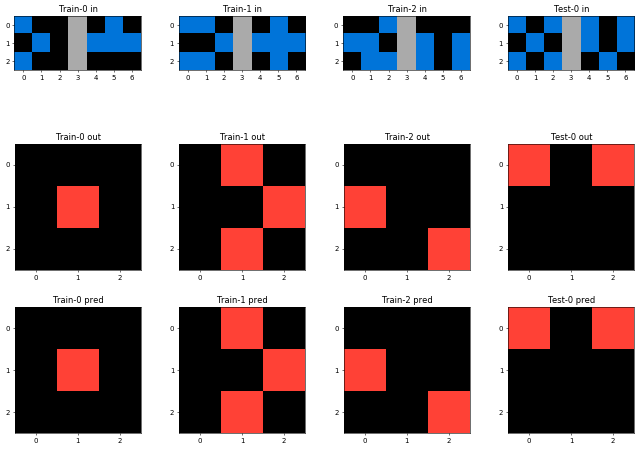

In [11]:
def task_train005(x):
    blue, red = color2num["blue"], color2num["red"]
    
    def split_by_gray_line(arr):
        H, W = arr.shape
        gray = color2num["gray"]
        Y = [-1]
        for y in range(H):
            if (arr[y, :]==gray).all():
                Y.append(y)
        Y.append(H)
        X = [-1]
        for x in range(W):
            if (arr[:, x]==gray).all():
                X.append(x)
        X.append(W)
        res = [[arr[y1+1:y2, x1+1:x2] for x1, x2 in zip(X[:-1], X[1:])] for y1, y2 in zip(Y[:-1], Y[1:])]
        return res
    
    def change_color(arr, d):
        res = arr.copy()
        for k, v in d.items():
            res[arr==k] = v
        return res
            
    x_split = split_by_gray_line(x)
    assert len(x_split)==1
    assert len(x_split[0])==2
    x1, x2 = x_split[0]
    y = x1 & x2
    y = change_color(y, {blue: red})
    return y

task = get_data(str(training_path / training_tasks[5]))
check(task, task_train005)
#plot_task(task)

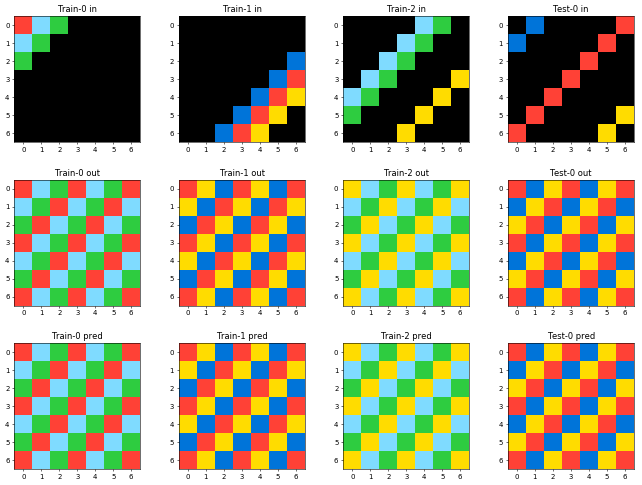

In [12]:
def task_train006(x):
    H, W = x.shape
    colors = [0, 0, 0]
    for yy in range(H):
        for xx in range(W):
            color = x[yy, xx]
            if color != 0:
                colors[(yy+xx)%3] = color
    y = x.copy()
    for yy in range(H):
        for xx in range(W):
            y[yy, xx] = colors[(yy+xx)%3]
    return y

task = get_data(str(training_path / training_tasks[6]))
check(task, task_train006)
#plot_task(task)

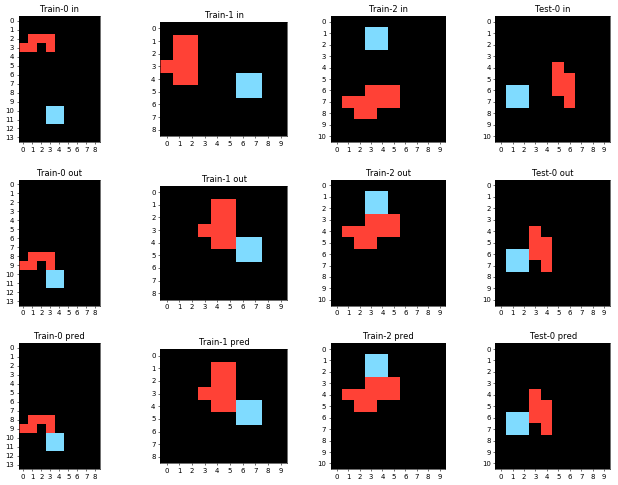

In [13]:
def task_train007(x):
    sky, red = color2num["sky"], color2num["red"]
    square_idx_set = set(tuple(idx) for idx in np.array(np.where(x==sky)).T)
    object_idx_list = [tuple(idx) for idx in np.array(np.where(x==red)).T]
    Dy = [0, 1, 0, -1]
    Dx = [1, 0, -1, 0]
    for dy, dx in zip(Dy, Dx):
        for n in range(1, 100):
            obj_idx = set((idx[0]+dy*n, idx[1]+dx*n) for idx in object_idx_list)
            if obj_idx & square_idx_set:
                y = np.zeros(x.shape, dtype=np.int32)
                for idx in square_idx_set:
                    y[idx] = sky
                for idx in obj_idx:
                    idx = (idx[0]-dy, idx[1]-dx)
                    y[idx] = red
                return y
    assert False

task = get_data(str(training_path / training_tasks[7]))
check(task, task_train007)
#plot_task(task)

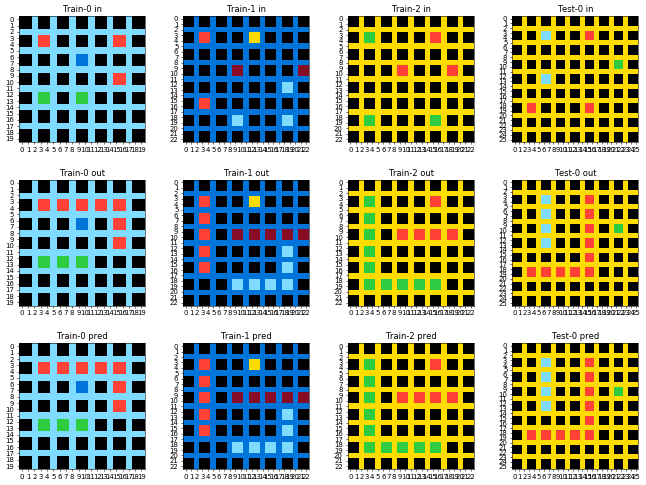

In [14]:
def task_train008(x):
    H, W = x.shape
    y = x.copy()
    l, r = x.copy(), x.copy()
    for yy in range(H):
        for xx in range(3, W):
            if x[yy, xx] == 0:
                l[yy, xx] = l[yy, xx-3]
        for xx in range(W-4, -1, -1):
            if x[yy, xx] == 0:
                r[yy, xx] = r[yy, xx+3]
        for xx in range(W):
            if l[yy, xx] == r[yy, xx]:
                y[yy, xx] = l[yy, xx]
    u, d = x.copy(), x.copy()
    for xx in range(W):
        for yy in range(3, H):
            if x[yy, xx] == 0:
                u[yy, xx] = u[yy-3, xx]
        for yy in range(H-4, -1, -1):
            if x[yy, xx] == 0:
                d[yy, xx] = d[yy+3, xx]
        for yy in range(H):
            if u[yy, xx] == d[yy, xx]:
                y[yy, xx] |= u[yy, xx]  # ignore black tiles by using '|='
    return y
    
task = get_data(str(training_path / training_tasks[8]))
check(task, task_train008)
#plot_task(task)

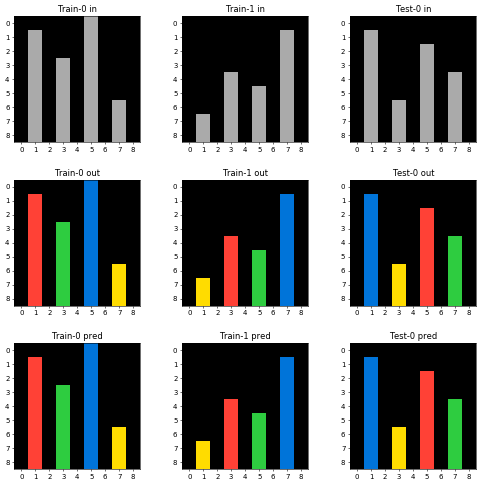

In [15]:
def task_train009(x):
    H, W = x.shape
    y = x.copy()
    gray, blue, red, green, yellow = color2num["gray"], color2num["blue"], color2num["red"], color2num["green"], color2num["yellow"]
    colors = [blue, red, green, yellow]
    colors_idx = 0
    for yy in range(H):
        for xx in range(W):
            if y[yy, xx]==gray:
                for y_ in range(yy, H):
                    y[y_, xx] = colors[colors_idx]
                colors_idx += 1
    return y

task = get_data(str(training_path / training_tasks[9]))
check(task, task_train009)
#plot_task(task)